<font size="5">Association Rule Learning</font>

<font size="4">Association rule learning is a method for discovering relations between variables in a dataset. It is often used to determine if there is a pattern in purchases that a customer will buy. For instance, if a customer buys hot dog buns, is it more likely for the customer to buy hot dogs?

Essentially, we can draw conclusions on the relationships between purchases. Knowing these associations, it is possible for retailers to grup these items closer to each other to increase the likelihood that customers buys items that are frequently purchased together.</font>

<font size="5">Theory</font><br><br>
<font size="4">The apriori algorithm that can learn association rules in relational databases. Let us examine some metrics that are essential for association rule learning:</font>

-Support: Indication of how frequently an item appears in a data set:
<br>    

$Support (A) = \frac{\text{Transactions of }A}{\text{Total Transactions}}$

<br>
<br>
-Confidence: The likelihood that an item B is also bought if item A is purchased. The general equation is:


$Confidence (A \rightarrow B) = \frac{\text{transactions containing both }A \text{ and } B}{\text{Transactions containing A}}$


or in our example:

$Confidence (\text{hot dog bun} \rightarrow \text{hot dog}) = \frac{\text{transactions containing both hot dog buns and hot dogs}}{\text{Transactions containing hot dog buns}}$

<br>
<br>    
and lastly Lift, the increased ratio in sale of item B when A is sold

$\text{Lift}(A \rightarrow B) = \frac{\text{Confidence }(A \rightarrow B)}{\text{Support (B)}}$

With these defined, let us examine if we can find items that are frequently purchased together in a dataset containing grocery data:


<img src="picture.jpg" width="600" height="600" />


<font size=5>Import Libraries</font>

In [1]:
import numpy as np
import pandas as pd
from apyori import apriori
import seaborn as sns
import matplotlib.pyplot as plt

<font size=5>Import Dataset</font>

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<font size=5>Checking for null values</font>

In [3]:
df.info()
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


False

[Text(0, 0, 'bottled beer'),
 Text(0, 0, 'canned beer'),
 Text(0, 0, 'shopping bags'),
 Text(0, 0, 'pip fruit'),
 Text(0, 0, 'pastry'),
 Text(0, 0, 'citrus fruit'),
 Text(0, 0, 'sausage'),
 Text(0, 0, 'bottled water'),
 Text(0, 0, 'tropical fruit'),
 Text(0, 0, 'root vegetables'),
 Text(0, 0, 'yogurt'),
 Text(0, 0, 'soda'),
 Text(0, 0, 'rolls/buns'),
 Text(0, 0, 'other vegetables'),
 Text(0, 0, 'whole milk')]

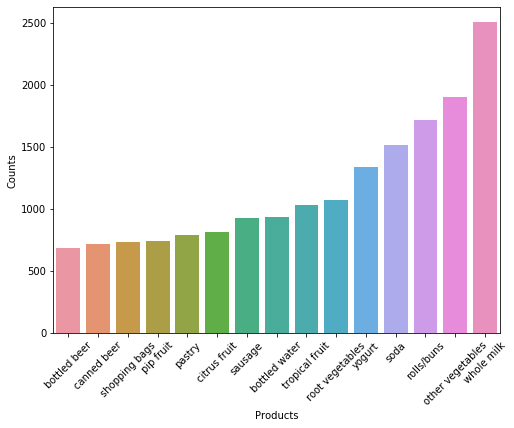

In [4]:
plt.figure(figsize=(8,6))
x = df['itemDescription'].value_counts().sort_values()[-15:]

fig=sns.barplot(x=x.index, y=x.values)
plt.xlabel('Products')
plt.ylabel('Counts')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)


<font size="5">Data preprocessing to use with apriori package</font>

In [5]:
item_names=df['itemDescription'].unique()

one_hot = pd.get_dummies(df['itemDescription'])
df2=df.drop('itemDescription', axis=1)
#df.drop('itemDescription', inplace=True, axis=1)
df2 = df2.join(one_hot)
df2.head()
records = df2.groupby(["Member_number","Date"])[item_names].apply(sum)
records = records.reset_index()[item_names]


In [6]:
def convert_to_string(x):
    for name in item_names:
        if x[name]> 0:
            x[name]= name
    return x

records = records.apply(convert_to_string, axis=1)
records.head()




,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x = records.values



In [8]:
X=[]
for j in range(len(x)):
    X.append([i for i in x[j] if i != 0])
    
X[0:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [27]:
association_rules = apriori(X, min_support=0.0002, min_confidence=0.02, min_lift=2, min_length=2, max_length=2)
association_results = list(association_rules)

In [28]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")


Rule: UHT-milk -> candles
Support: 0.00020049455323130388
Confidence: 0.04545454545454545
Lift: 2.125426136363636
Rule: domestic eggs -> artif. sweetener
Support: 0.00020049455323130388
Confidence: 0.10344827586206896
Lift: 2.7890027958993477
Rule: artif. sweetener -> soda
Support: 0.00046782062420637575
Confidence: 0.2413793103448276
Lift: 2.4857251346797353
Rule: mustard -> baking powder
Support: 0.00020049455323130388
Confidence: 0.024793388429752067
Lift: 4.032429033417175
Rule: beef -> specialty fat
Support: 0.00020049455323130388
Confidence: 0.10344827586206896
Lift: 3.047040456149878
Rule: berries -> condensed milk
Support: 0.0003341575887188398
Confidence: 0.05102040816326531
Lift: 2.34177413296607
Rule: rice -> berries
Support: 0.00020049455323130388
Confidence: 0.06122448979591836
Lift: 2.8101289595592833
Rule: berries -> soap
Support: 0.00020049455323130388
Confidence: 0.15
Lift: 6.884815950920245
Rule: sweet spreads -> berries
Support: 0.00026732607097507187
Confidence: 0.0

In [29]:
def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(association_results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.head()


,Item #1,Item #2,Support,Confidence,Lift
0,candles,UHT-milk,0.000200,0.045455,2.125426
1,artif. sweetener,domestic eggs,0.000200,0.103448,2.789003
2,artif. sweetener,soda,0.000468,0.241379,2.485725
3,baking powder,mustard,0.000200,0.024793,4.032429
4,specialty fat,beef,0.000200,0.103448,3.047040


In [30]:
resultsinDataFrame.sort_values('Lift', ascending=False)[0:10]

,Item #1,Item #2,Support,Confidence,Lift
168,seasonal products,soups,0.000334,0.047170,14.704206
58,cookware,oil,0.000200,0.176471,11.840939
162,rice,roll products,0.000200,0.061224,11.171976
65,curd cheese,mustard,0.000200,0.065217,10.607042
56,condensed milk,liver loaf,0.000200,0.030612,9.161020
150,nuts/prunes,white wine,0.000200,0.090909,7.772987
171,soft cheese,spices,0.000200,0.020000,7.481500
35,canned fruit,onions,0.000200,0.142857,7.054691
7,soap,berries,0.000200,0.150000,6.884816
119,instant coffee,processed cheese,0.000267,0.067797,6.673952


Based on entry #58, we can see that stores should place oil in the cookware aisles!